# Analyses of Supply-Demand Factors Impacting U.S. Home Prices

## Two datasets are collected for this assignment :- 
### 1. Supply Data 
### 2. Demand Data
### These datasets contain quarterly data on key supply-demand factors that influence US home prices nationally in the last 20 years and are collected from Kaggle.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,KFold

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

## Reading the Data

### Supply

In [2]:
df_supply = pd.read_csv("data/supply.csv")
df_supply.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895


1. CSUSHPISA :- S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)
2. MSACSR :- Monthly Supply of New Houses in the United States (Seasonally Adjusted)
3. PERMIT :- New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units (Thousands of Units, Seasonally Adjusted Annual Rate)
4. TLRESCONS :- Total Construction Spending: Residential in the United States (Millions of Dollars, Seasonally Adjusted Annual Rate)
5. EVACANTUSQ176N :- Housing Inventory Estimate: Vacant Housing Units in the United States (Thousands of Units, Not Seasonally Adjusted)

In [3]:
df_supply.shape

(82, 6)

In [4]:
df_supply.dtypes

DATE              object
CSUSHPISA         object
MSACSR            object
PERMIT            object
TLRESCONS         object
EVACANTUSQ176N    object
dtype: object

In [5]:
df_supply['DATE'] = pd.to_datetime(df_supply['DATE'])
df_supply['CSUSHPISA'] = pd.to_numeric(df_supply['CSUSHPISA'], errors='coerce')
df_supply['MSACSR'] = pd.to_numeric(df_supply['MSACSR'], errors='coerce')
df_supply['PERMIT'] = pd.to_numeric(df_supply['PERMIT'], errors='coerce')
df_supply['TLRESCONS'] = pd.to_numeric(df_supply['TLRESCONS'], errors='coerce')
df_supply['EVACANTUSQ176N'] = pd.to_numeric(df_supply['EVACANTUSQ176N'], errors='coerce')

In [6]:
df_supply.isna().sum()

DATE              0
CSUSHPISA         2
MSACSR            1
PERMIT            1
TLRESCONS         1
EVACANTUSQ176N    1
dtype: int64

### Handling the missing value in supply

In [7]:
df_supply['CSUSHPISA'] = df_supply['CSUSHPISA'].fillna(df_supply['CSUSHPISA'].mean())
df_supply['MSACSR'] = df_supply['MSACSR'].fillna(df_supply['MSACSR'].mean())
df_supply['PERMIT'] = df_supply['PERMIT'].fillna(df_supply['PERMIT'].mean())
df_supply['TLRESCONS'] = df_supply['TLRESCONS'].fillna(df_supply['TLRESCONS'].mean())
df_supply['EVACANTUSQ176N'] = df_supply['EVACANTUSQ176N'].fillna(df_supply['EVACANTUSQ176N'].mean())

In [8]:
df_supply.isna().sum()

DATE              0
CSUSHPISA         0
MSACSR            0
PERMIT            0
TLRESCONS         0
EVACANTUSQ176N    0
dtype: int64

In [9]:
df_supply.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
0,2003-01-01,129.321000,4.200000,1806.333333,421328.6667,14908.0
1,2003-01-04,131.756000,3.833333,1837.666667,429308.6667,15244.0
2,2003-01-07,135.013000,3.633333,1937.333333,458890.0000,15614.0
3,2003-01-10,138.835667,3.966667,1972.333333,491437.3333,15654.0
4,2004-01-01,143.298667,3.700000,1994.666667,506856.3333,15895.0


### Demand

In [10]:
df_demand = pd.read_csv("data/demand.csv")
df_demand.head()

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.298667,5.597500,98.000000,2.000000,212700,11923.447


1. CSUSHPISA :- S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)
2. MORTGAGE15US :- 30-Year Fixed Rate Mortgage Average in the United States (Percent, Not Seasonally Adjusted)
3. UMCSENT :- 	University of Michigan: Consumer Sentiment
4. INTDSRUSM193N :-	Interest Rates, Discount Rate for United States (Billions of Dollars, Seasonally Adjusted Annual Rate)
5. MSPUS :-	Median Sales Price of Houses Sold for the United States (Not Seasonally Adjusted)
6. GDP	:- Gross Domestic Product (Billions of Dollars, Seasonally Adjusted Annual Rate)



In [11]:
df_demand.shape

(81, 7)

In [12]:
df_demand.dtypes

DATE              object
CSUSHPISA        float64
MORTGAGE30US     float64
UMCSENT          float64
INTDSRUSM193N    float64
MSPUS              int64
GDP              float64
dtype: object

In [13]:
df_demand['DATE'] = pd.to_datetime(df_demand['DATE'])
df_demand.dtypes

DATE             datetime64[ns]
CSUSHPISA               float64
MORTGAGE30US            float64
UMCSENT                 float64
INTDSRUSM193N           float64
MSPUS                     int64
GDP                     float64
dtype: object

In [14]:
df_demand.isna().sum()

DATE             0
CSUSHPISA        1
MORTGAGE30US     0
UMCSENT          0
INTDSRUSM193N    7
MSPUS            0
GDP              0
dtype: int64

### Handling the missing value in demand

In [15]:
imputer = SimpleImputer(strategy='mean')
df_demand['INTDSRUSM193N'] = imputer.fit_transform(df_demand[['INTDSRUSM193N']])

df_demand['CSUSHPISA'] = df_demand['CSUSHPISA'].fillna(df_demand['CSUSHPISA'].mean())

In [16]:
df_demand.isna().sum()

DATE             0
CSUSHPISA        0
MORTGAGE30US     0
UMCSENT          0
INTDSRUSM193N    0
MSPUS            0
GDP              0
dtype: int64

In [17]:
df_demand.tail()

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
76,2022-01-01,290.868000,3.822308,63.133333,1.961712,433100,24740.480
77,2022-01-04,303.422667,5.266154,57.866667,1.961712,449300,25248.476
78,2022-01-07,301.726333,5.623077,56.100000,1.961712,468000,25723.941
79,2022-01-10,297.896667,6.664615,58.800000,1.961712,479500,26137.992
80,2023-01-01,180.658712,6.372308,64.633333,1.961712,436800,26465.865


## Merging the demand and supply data

In [18]:
df_supply = df_supply.sort_values('DATE')
df_demand = df_demand.sort_values('DATE')

In [19]:
df_merged = pd.merge(df_supply, df_demand, on='DATE')

In [20]:
df_merged.head()

,DATE,CSUSHPISA_x,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,CSUSHPISA_y,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,2003-01-01,129.321000,4.200000,1806.333333,421328.6667,14908.0,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,2003-01-04,131.756000,3.833333,1837.666667,429308.6667,15244.0,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,2003-01-07,135.013000,3.633333,1937.333333,458890.0000,15614.0,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,2003-01-10,138.835667,3.966667,1972.333333,491437.3333,15654.0,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,2004-01-01,143.298667,3.700000,1994.666667,506856.3333,15895.0,143.298667,5.597500,98.000000,2.000000,212700,11923.447


In [21]:
df_merged.drop('CSUSHPISA_y', axis=1, inplace=True)

In [22]:
df_merged.rename(columns={'CSUSHPISA_x': 'CSUSHPISA'}, inplace=True)

In [23]:
df_merged.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,2003-01-01,129.321000,4.200000,1806.333333,421328.6667,14908.0,5.840769,79.966667,2.250000,186000,11174.129
1,2003-01-04,131.756000,3.833333,1837.666667,429308.6667,15244.0,5.506923,89.266667,2.166667,191800,11312.766
2,2003-01-07,135.013000,3.633333,1937.333333,458890.0000,15614.0,6.033846,89.300000,2.000000,191900,11566.669
3,2003-01-10,138.835667,3.966667,1972.333333,491437.3333,15654.0,5.919286,91.966667,2.000000,198800,11772.234
4,2004-01-01,143.298667,3.700000,1994.666667,506856.3333,15895.0,5.597500,98.000000,2.000000,212700,11923.447


In [24]:
df_merged.dtypes

DATE              datetime64[ns]
CSUSHPISA                float64
MSACSR                   float64
PERMIT                   float64
TLRESCONS                float64
EVACANTUSQ176N           float64
MORTGAGE30US             float64
UMCSENT                  float64
INTDSRUSM193N            float64
MSPUS                      int64
GDP                      float64
dtype: object

### Changing the name of colums for better understanding

In [25]:
df_merged.rename(columns={'CSUSHPISA':'National_home_price_index','MSACSR':'Monthly_supply','PERMIT':'Permit_issued','TLRESCONS':'Total_construction_spending'\
                  ,'EVACANTUSQ176N':'Housing_inventory_estimate','MORTGAGE30US':'30y_fixed_mortgage_rate','UMCSENT':'Consumer_sentiment','INTDSRUSM193N':'Interest_rates'\
                  ,'MSPUS':'Median_sales_price','DATE':'Date'},inplace = True)

In [26]:
df_merged.head()

,Date,National_home_price_index,Monthly_supply,Permit_issued,Total_construction_spending,Housing_inventory_estimate,30y_fixed_mortgage_rate,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,2003-01-01,129.321000,4.200000,1806.333333,421328.6667,14908.0,5.840769,79.966667,2.250000,186000,11174.129
1,2003-01-04,131.756000,3.833333,1837.666667,429308.6667,15244.0,5.506923,89.266667,2.166667,191800,11312.766
2,2003-01-07,135.013000,3.633333,1937.333333,458890.0000,15614.0,6.033846,89.300000,2.000000,191900,11566.669
3,2003-01-10,138.835667,3.966667,1972.333333,491437.3333,15654.0,5.919286,91.966667,2.000000,198800,11772.234
4,2004-01-01,143.298667,3.700000,1994.666667,506856.3333,15895.0,5.597500,98.000000,2.000000,212700,11923.447


## Exploratory Data Analysis

### Plotting the data

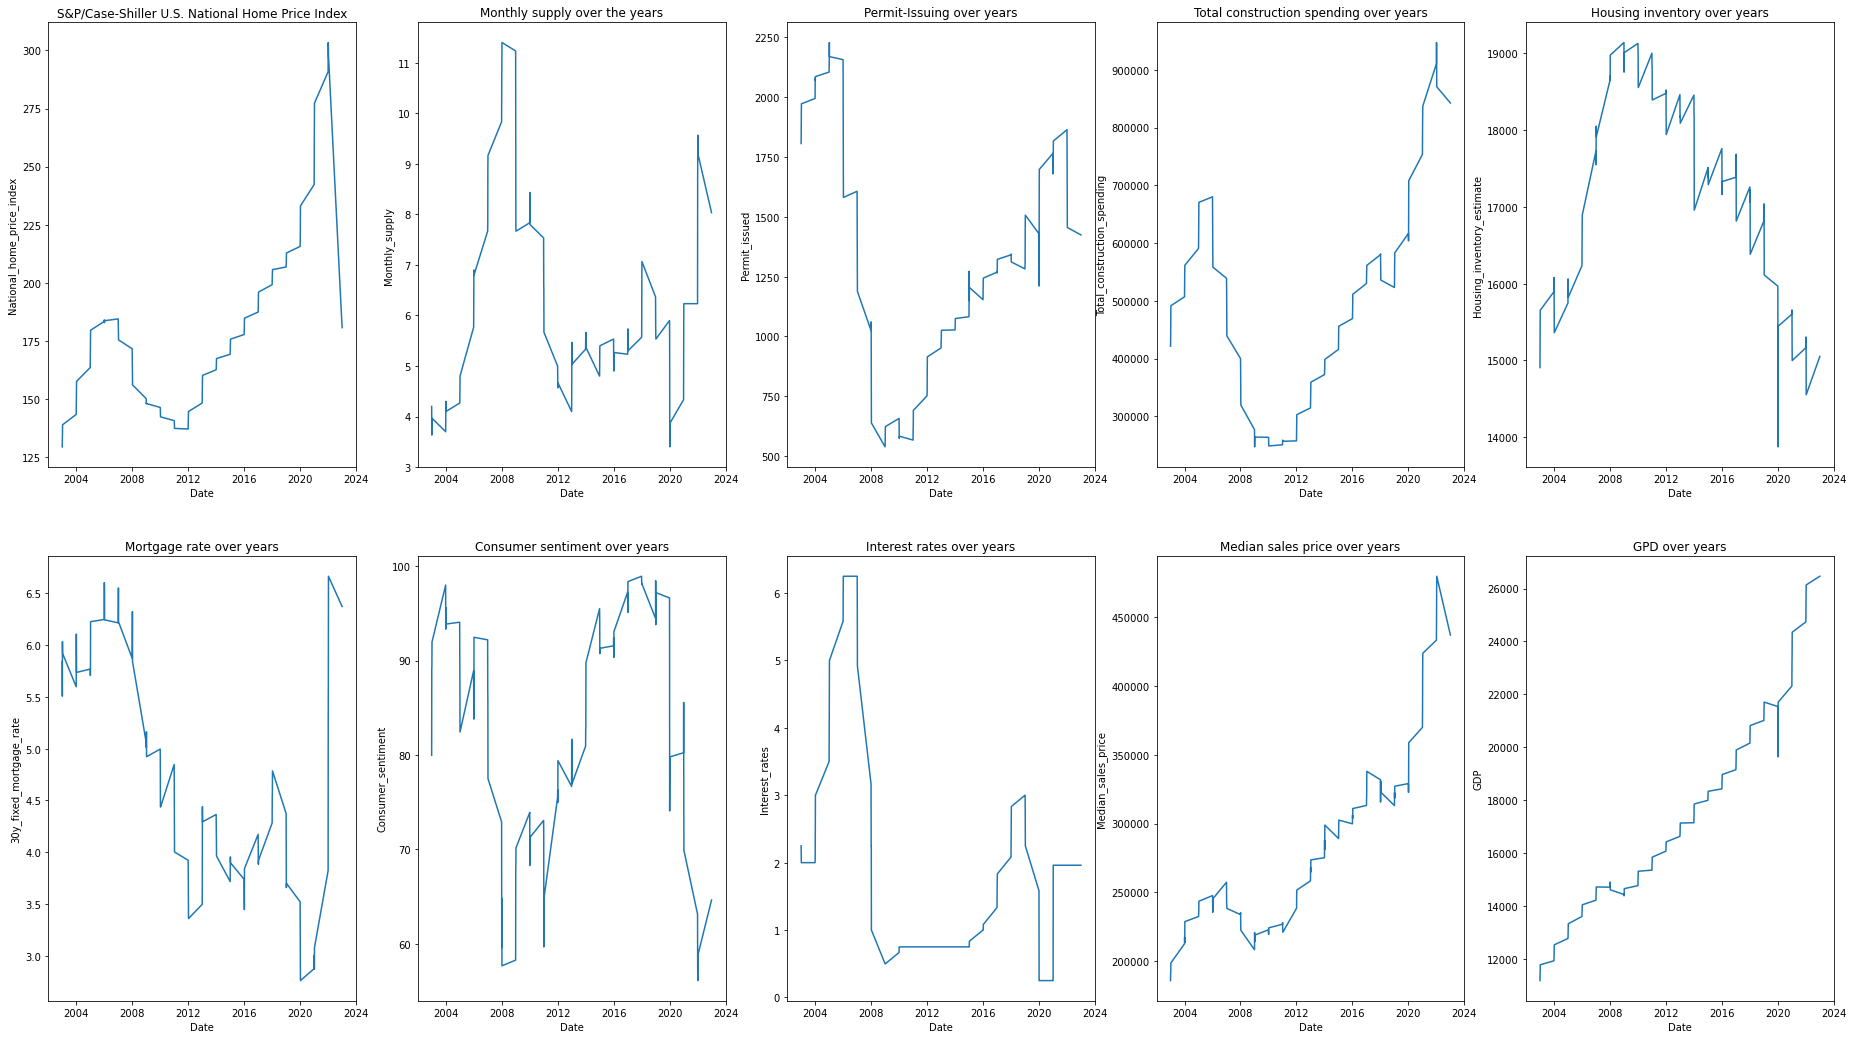

In [27]:
figure,ax = plt.subplots(nrows = 2,ncols = 5,figsize=(32,18))

sns.lineplot(ax = ax[0,0],x='Date',y='National_home_price_index',data = df_merged);
sns.lineplot(ax = ax[0,1],x='Date',y='Monthly_supply',data = df_merged);
sns.lineplot(ax = ax[0,2],x='Date',y='Permit_issued',data = df_merged);
sns.lineplot(ax = ax[0,3],x='Date',y='Total_construction_spending',data = df_merged);
sns.lineplot(ax = ax[0,4],x='Date',y='Housing_inventory_estimate',data = df_merged);
sns.lineplot(ax = ax[1,0],x='Date',y='30y_fixed_mortgage_rate',data = df_merged);

sns.lineplot(ax = ax[1,1],x='Date',y='Consumer_sentiment',data = df_merged);
sns.lineplot(ax = ax[1,2],x='Date',y='Interest_rates',data =df_merged);
sns.lineplot(ax = ax[1,3],x='Date',y='Median_sales_price',data =df_merged);
sns.lineplot(ax = ax[1,4],x='Date',y='GDP',data = df_merged);

ax[0,0].title.set_text('S&P/Case-Shiller U.S. National Home Price Index')
ax[0,1].title.set_text('Monthly supply over the years')
ax[0,2].title.set_text('Permit-Issuing over years')
ax[0,3].title.set_text('Total construction spending over years')
ax[0,4].title.set_text('Housing inventory over years')
ax[1,0].title.set_text('Mortgage rate over years')
ax[1,1].title.set_text('Consumer sentiment over years')
ax[1,2].title.set_text('Interest rates over years')
ax[1,3].title.set_text('Median sales price over years')
ax[1,4].title.set_text('GPD over years')


### Correlation Heatmap

Text(0.5, 1.0, 'Correlation between different factors')

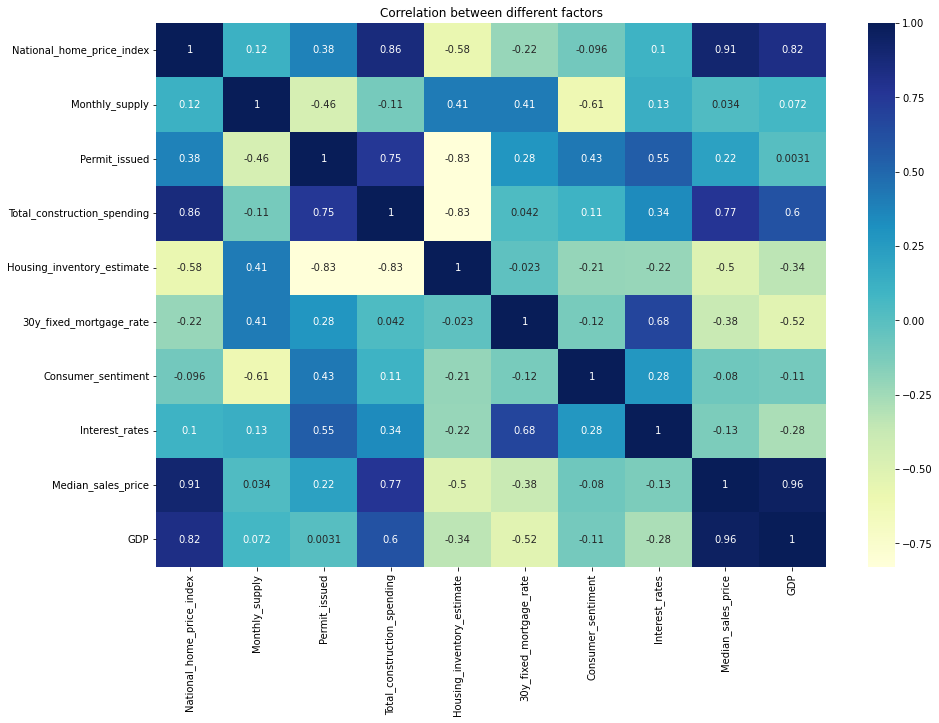

In [28]:
corr = df_merged.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data = corr,cmap="YlGnBu", annot=True)
plt.title('Correlation between different factors')

Monthly supply of new homes and authorized housing units have positive but varying impacts on home prices, while increased construction spending strongly raises prices. Conversely, a higher number of vacant housing units, mortgage rates, and lower consumer sentiment can modestly reduce home prices. Strong correlations exist between median sales prices, GDP, and higher home prices.

Key factors influencing home prices include supply and demand dynamics, construction spending, vacant housing units, mortgage rates, consumer sentiment, interest rates, median sales prices, and GDP, with varying degrees of impact.

### Correlation Analysis of important factors on National Home price Index

To understand how the House Price Index is changing in the last 20 years, we have plotted a quarterly line plot of highly correlated factors with the National House Price Index.

In [29]:
df = df_merged.copy()

In [30]:
df.head()

,Date,National_home_price_index,Monthly_supply,Permit_issued,Total_construction_spending,Housing_inventory_estimate,30y_fixed_mortgage_rate,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,2003-01-01,129.321000,4.200000,1806.333333,421328.6667,14908.0,5.840769,79.966667,2.250000,186000,11174.129
1,2003-01-04,131.756000,3.833333,1837.666667,429308.6667,15244.0,5.506923,89.266667,2.166667,191800,11312.766
2,2003-01-07,135.013000,3.633333,1937.333333,458890.0000,15614.0,6.033846,89.300000,2.000000,191900,11566.669
3,2003-01-10,138.835667,3.966667,1972.333333,491437.3333,15654.0,5.919286,91.966667,2.000000,198800,11772.234
4,2004-01-01,143.298667,3.700000,1994.666667,506856.3333,15895.0,5.597500,98.000000,2.000000,212700,11923.447


In [31]:
df.Date

0    2003-01-01
1    2003-01-04
2    2003-01-07
3    2003-01-10
4    2004-01-01
        ...    
76   2022-01-01
77   2022-01-04
78   2022-01-07
79   2022-01-10
80   2023-01-01
Name: Date, Length: 81, dtype: datetime64[ns]

In [32]:
df = df.set_index('Date')

In [33]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)

def plot_highly_corr(factor,col):
    grouped_data = df.groupby('QUARTER').agg({factor: 'sum', 'National_home_price_index': 'mean'}).reset_index()


    scaler = MinMaxScaler()
    grouped_data[[factor, 'National_home_price_index']] = scaler.fit_transform(grouped_data[[factor, 'National_home_price_index']])


    grouped_data = grouped_data.sort_values('QUARTER')


    plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

    bar_width = 0.4
    opacity = 0.8


    #plt.bar(grouped_data['QUARTER'], grouped_data[factor], width=bar_width, alpha=opacity, color='skyblue', label=factor)
    plt.plot(grouped_data['QUARTER'], grouped_data[factor], marker='o', linestyle='-', color= col, label=factor)

    plt.plot(grouped_data['QUARTER'], grouped_data['National_home_price_index'], marker='o', linestyle='-', color='red', label='National_home_price_index')

    plt.title(factor + ' vs National Home Price Index (Normalized)')
    plt.xlabel('Quarter')
    plt.ylabel('Normalized Values')
    plt.legend()

    plt.grid(True) 
    plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

    plt.tight_layout()
    return plt.show()

In [34]:
columns = df.columns[1:-1]
columns

Index(['Monthly_supply', 'Permit_issued', 'Total_construction_spending',
       'Housing_inventory_estimate', '30y_fixed_mortgage_rate',
       'Consumer_sentiment', 'Interest_rates', 'Median_sales_price', 'GDP'],
      dtype='object')

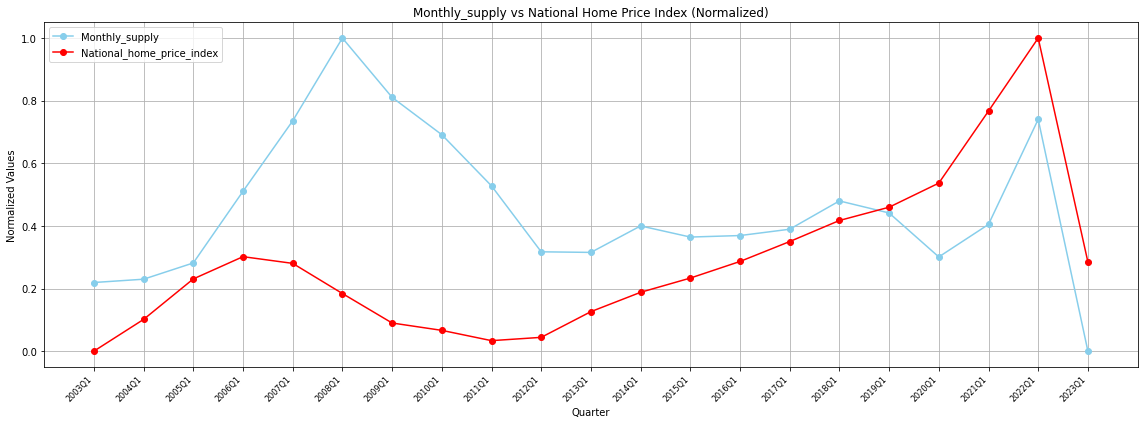

None


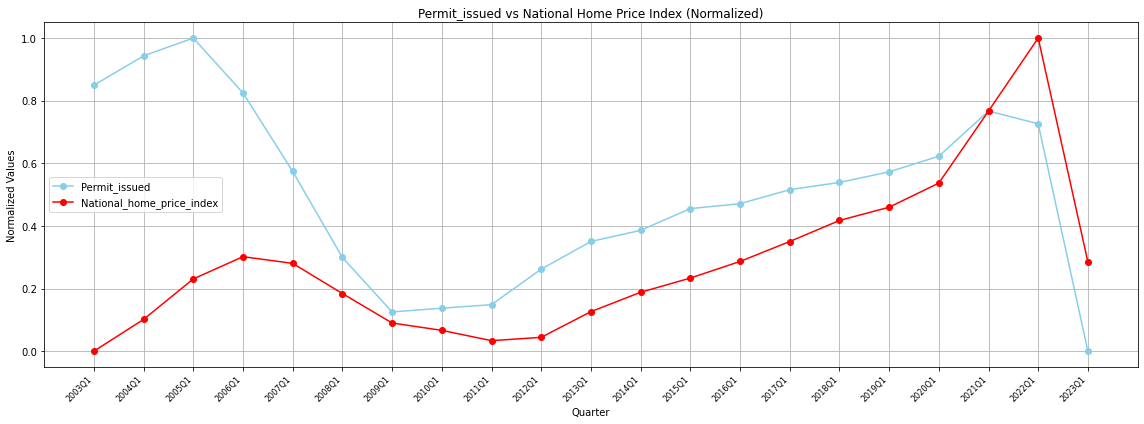

None


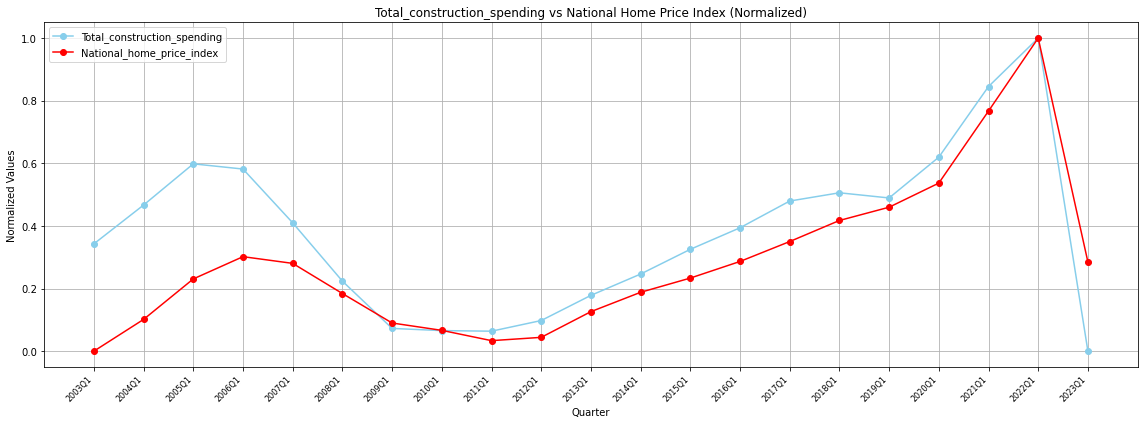

None


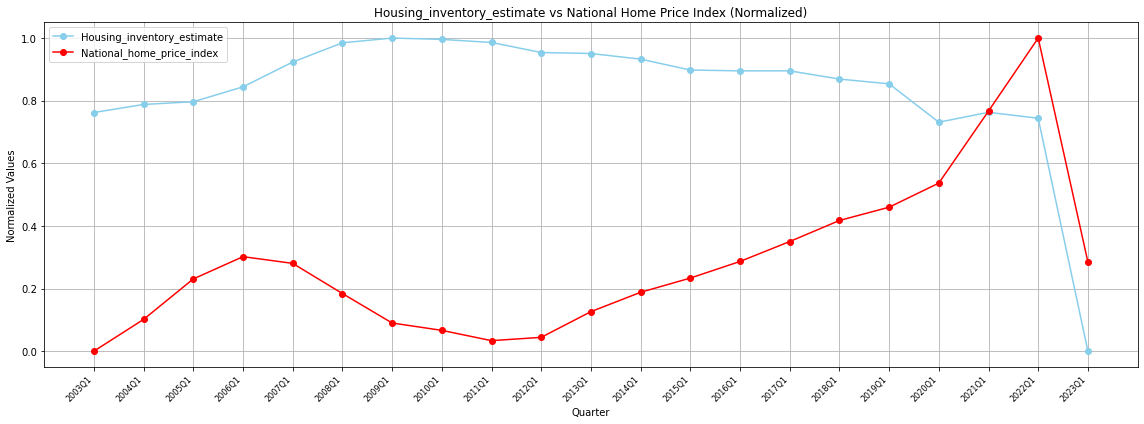

None


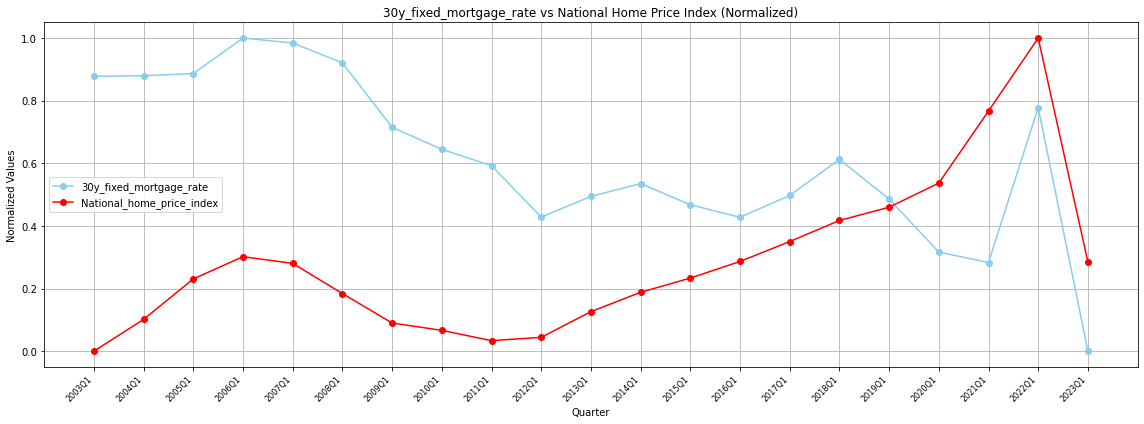

None


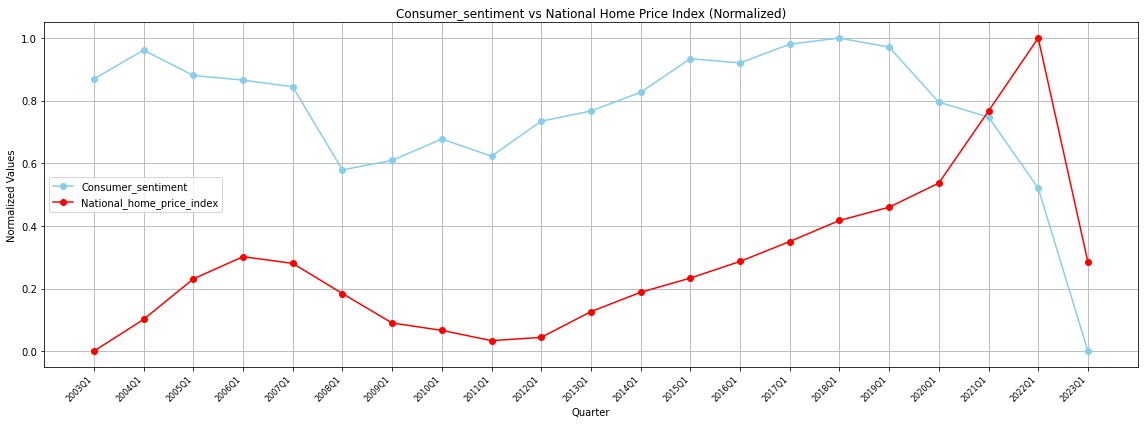

None


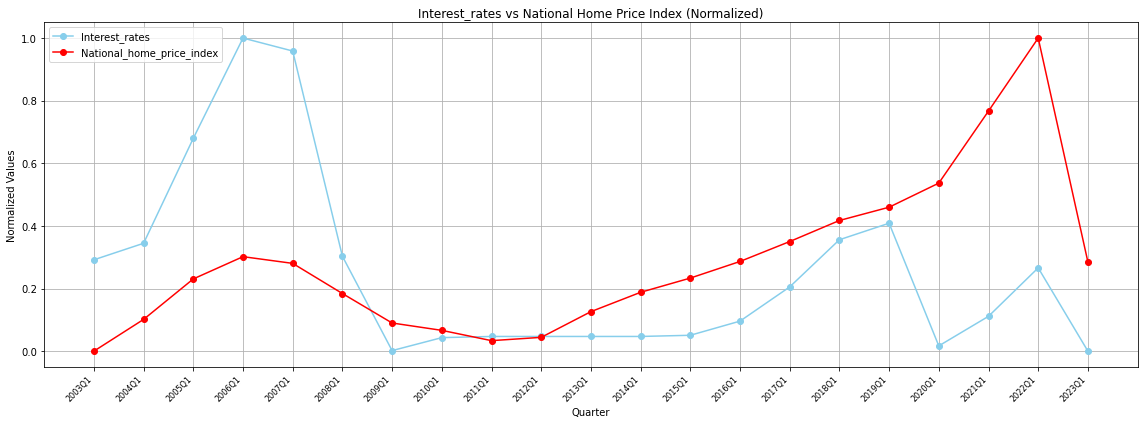

None


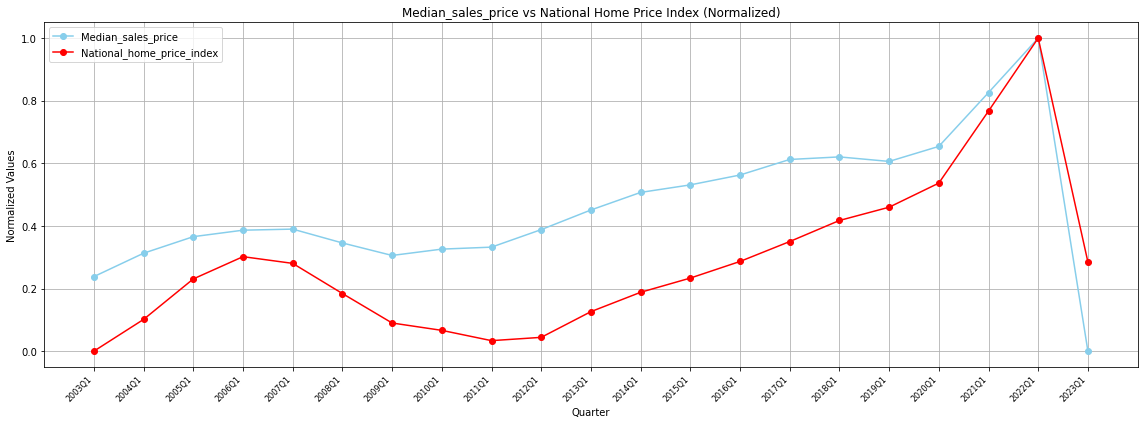

None


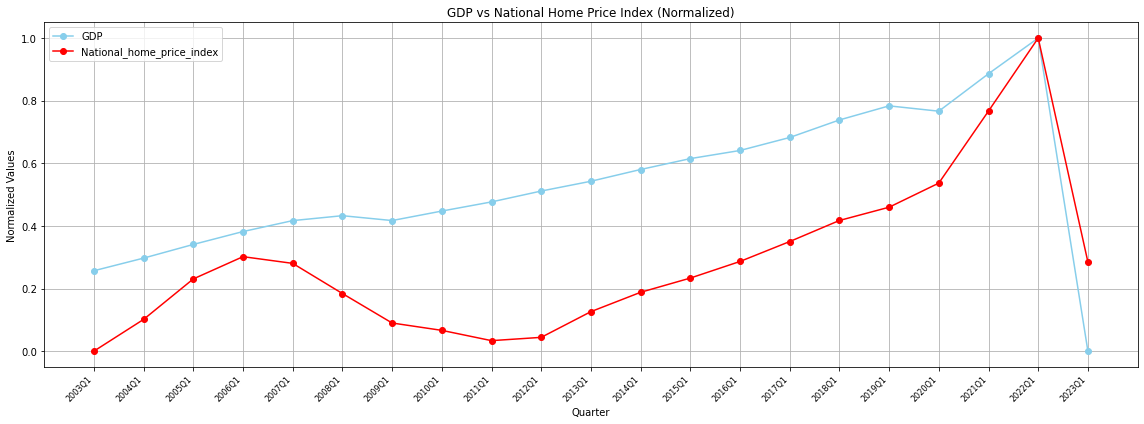

None


In [35]:
for i in columns:
    print(plot_highly_corr(i,'skyblue'))

## ML Model

In [36]:
df_merged= df_merged.drop('Date',axis=1)
X= df_merged.drop('National_home_price_index',axis=1)
y= df_merged['National_home_price_index']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
model_lr = LinearRegression()
model_xgb = XGBRegressor()
model_rf = RandomForestRegressor(n_estimators=100, max_depth=5)
model_dt = DecisionTreeRegressor()
model_ridge = Ridge(alpha=10)

In [39]:
model_lr.fit(X_train_scaled,y_train)
model_xgb.fit(X_train_scaled,y_train)
model_rf.fit(X_train_scaled,y_train)
model_dt.fit(X_train_scaled,y_train)
model_ridge.fit(X_train_scaled,y_train)

Ridge(alpha=10)

In [40]:
models = ['LinearRegression','XGBRegressor','RandomForestRegressor','DescisionTreeRegressor','Ridge']
model_r2score = []
model_mse = []

model_r2score.append(r2_score(y_test, model_lr.predict(X_test_scaled)))
model_r2score.append(r2_score(y_test, model_xgb.predict(X_test_scaled)))
model_r2score.append(r2_score(y_test, model_rf.predict(X_test_scaled)))
model_r2score.append(r2_score(y_test, model_dt.predict(X_test_scaled)))
model_r2score.append(r2_score(y_test, model_ridge.predict(X_test_scaled)))

model_mse.append(mean_squared_error(y_test, model_lr.predict(X_test_scaled)))
model_mse.append(mean_squared_error(y_test, model_xgb.predict(X_test_scaled)))
model_mse.append(mean_squared_error(y_test, model_rf.predict(X_test_scaled)))
model_mse.append(mean_squared_error(y_test, model_dt.predict(X_test_scaled)))
model_mse.append(mean_squared_error(y_test, model_ridge.predict(X_test_scaled)))


model_r2score = list(map(lambda x: round(x, ndigits=4), model_r2score))
model_mse = list(map(lambda x: round(x, ndigits=4), model_mse))

In [49]:
model_r2score_df = pd.DataFrame({'Models': models, 'R2 Score': model_r2score})
model_r2score_df

,Models,R2 Score
0,LinearRegression,0.9307
1,XGBRegressor,0.9341
2,RandomForestRegressor,0.9675
3,DescisionTreeRegressor,0.9012
4,Ridge,0.9626


In [50]:
model_mse_df = pd.DataFrame({'Models': models, 'MSE': model_mse})
model_mse_df

,Models,MSE
0,LinearRegression,68.8879
1,XGBRegressor,65.4954
2,RandomForestRegressor,32.3335
3,DescisionTreeRegressor,98.2115
4,Ridge,37.2031


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


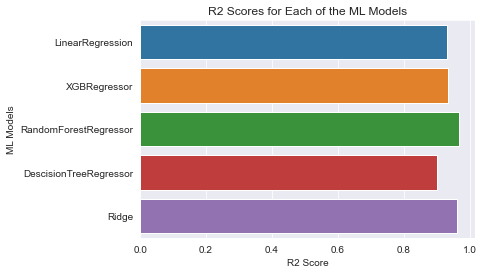

In [42]:
sns.set_style('darkgrid')
sns.barplot(model_r2score, models)
plt.title('R2 Scores for Each of the ML Models')
plt.xlabel('R2 Score')
plt.ylabel('ML Models')
plt.show()

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


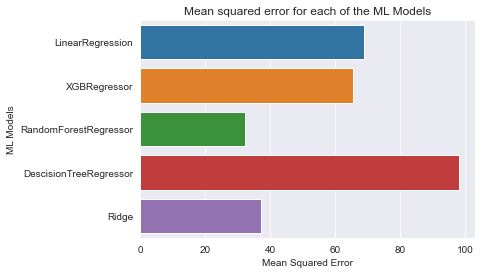

In [43]:
sns.set_style('darkgrid')
sns.barplot(model_mse, models)
plt.title('Mean squared error for each of the ML Models')
plt.xlabel('Mean Squared Error')
plt.ylabel('ML Models')
plt.show()

In this evaluation, the Random Forest Regressor model demonstrated strong performance. The Mean Squared Error (MSE) for the testing dataset was 32.33, indicating that prediction errors were relatively low. Additionally, the R-squared score stood at 0.9675, signifying that the model can account for approximately 96.75% of the variability observed in the target variable.

### Calculate permutation feature importances

In [44]:
# Calculate permutation feature importances
feature_importances = model_rf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)
sorted_feature_importance

,Feature,Importance
2,Total_construction_spending,0.303657
8,GDP,0.292082
7,Median_sales_price,0.233893
1,Permit_issued,0.064084
3,Housing_inventory_estimate,0.037668
5,Consumer_sentiment,0.021352
4,30y_fixed_mortgage_rate,0.018615
6,Interest_rates,0.014440
0,Monthly_supply,0.014208


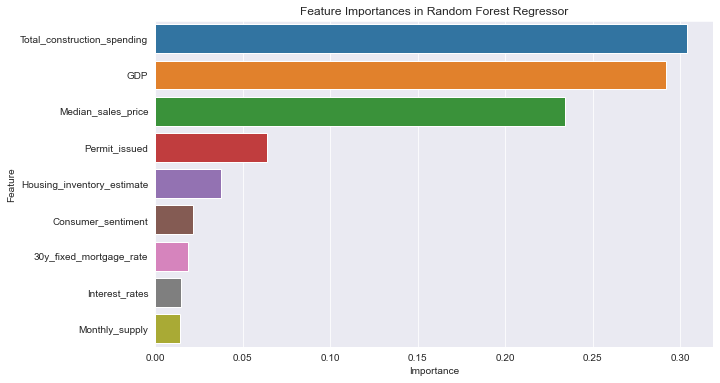

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance)
plt.title('Feature Importances in Random Forest Regressor')
plt.show()


All the features are significantly impacting the predicted home price index but the features like Total construction spending, GDP, Median Sales Price and Permit issued which also had the highest correlation with national home price index have more impact than rest of the factors.

## Conclusion

#### After analyzing the correlation, different ML Models and Random forest Regressor coefficients , we conclude that :- 
1. Supply-related factors, such as housing inventory and the authorization of housing units, positively impact home prices. Increased spending on residential construction projects also significantly contributes to higher home prices.
2. On the other hand, demand-related factors like mortgage interest rates have a negative effect on home prices. Elevated mortgage rates and reduced consumer sentiment are associated with slightly lower home prices.
3. Economic factors, including GDP, Total Construction Spending, interest rates, play a pivotal role in determining home prices. A robust economy characterized by higher GDP and somewhat lower interest rates tends to bolster higher home prices.
4. The median sales price of houses sold strongly correlates with home prices, illustrating the significance of market dynamics and buyer behavior in shaping home price trends.
5. These insights hold value for various stakeholders in the real estate sector, such as homebuyers, sellers, developers, and policymakers. Understanding the factors that influence home prices can facilitate well-informed decisions regarding investments, financing, and economic strategies.
